# **Airbnd Madrid**

## *SIN PANDAS*

## Requisitos obligatorios
**Sin usar Pandas**:

* **1.-** Extraer del fichero de alojamientos una lista con todos los alojamientos, donde cada alojamiento sea un diccionario que contenga el identificador del alojamiento, el identificador del anfitrión, el distrito, el precio y las plazas.
* **2.-** Crear una función que reciba la lista de alojamientos y devuelva el número de alojamientos en cada distrito.
* **3.-** Crear una función que reciba la lista de alojamientos y un número de ocupantes y devuelva la lista de alojamientos con un número de plazas mayor o igual que el número de ocupantes.
* **4.-** Crear una función que reciba la lista de alojamientos un distrito, y devuelva los 10 alojamientos más baratos del distrito.
* **5.-** Crear una función que reciba la lista de alojamientos y devuelva un diccionario con los anfitriones y el número de alojamientos que posee cada uno.

In [ ]:
def leer_primera_linea(file):
    lista = []
    with open(file, 'r') as f:
        first_line = f.readline()
        lista.append(first_line)
        for i in range(len(lista)):
            print(lista[i])


file = 'madrid-airbnb-listings-small.csv'
leer_primera_linea(file)

id	listing_url	scrape_id	last_scraped	name	summary	space	description	experiences_offered	neighborhood_overview	notes	transit	access	interaction	house_rules	thumbnail_url	medium_url	picture_url	xl_picture_url	host_id	host_url	host_name	host_since	host_location	host_about	host_response_time	host_response_rate	host_acceptance_rate	host_is_superhost	host_thumbnail_url	host_picture_url	host_neighbourhood	host_listings_count	host_total_listings_count	host_verifications	host_has_profile_pic	host_identity_verified	street	neighbourhood	neighbourhood_cleansed	neighbourhood_group_cleansed	city	state	zipcode	market	smart_location	country_code	country	latitude	longitude	is_location_exact	property_type	room_type	accommodates	bathrooms	bedrooms	beds	bed_type	amenities	square_feet	price	weekly_price	monthly_price	security_deposit	cleaning_fee	guests_included	extra_people	minimum_nights	maximum_nights	minimum_minimum_nights	maximum_minimum_nights	minimum_maximum_nights	maximum_maximum_nights	minimum_ni

In [ ]:
import csv

def reescribir_csv(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        reader = csv.reader(file, delimiter='\t')
        rows = list(reader)
        
    with open(output_file, 'w', newline='',encoding='utf-8') as file:
        writer = csv.writer(file, delimiter=';')
        writer.writerows(rows)
    print('Archivo creado con exito.')

input_file = 'madrid-airbnb-listings-small.csv'  
output_file = 'madrid_airbnb.csv'  
reescribir_csv(input_file, output_file)

Archivo creado con exito.


## **1.-** 
    Extraer del fichero de alojamientos una lista con todos los alojamientos, donde cada alojamiento sea un diccionario que contenga el identificador del alojamiento, el identificador del anfitrión, el distrito, el precio y las plazas.

In [ ]:
def leer_columna(file, columna):
    lista = []
    with open(file, 'r', encoding='utf-8') as f:
        reader = csv.reader(f, delimiter=';')
        for row in reader:
            lista.append(row[columna])
    return lista


#  Creamos uan lista con los valores de cada columna que necesitamos

lista_alojamientos = leer_columna('madrid_airbnb.csv', 1)
lista_id_alojamiento = leer_columna('madrid_airbnb.csv', 0)
lista_id_anfitrion = leer_columna('madrid_airbnb.csv', 19)
lista_distrito = leer_columna('madrid_airbnb.csv', 38)
lista_precio = leer_columna('madrid_airbnb.csv', 60)
lista_num_plazas = leer_columna('madrid_airbnb.csv', 65)

In [ ]:
#  Borramos el primer elemento de cada lista  porque es el encabezado

del lista_alojamientos[0]
del lista_id_alojamiento[0]
del lista_id_anfitrion[0]
del lista_distrito[0]
del lista_precio[0]
del lista_num_plazas[0]

In [ ]:
#  Hacemos una funcion que crea un diccionario con los valores de cada columna

def crear_diccionarios(lista):
    diccionarios = []
    for i in range(len(lista)):
        diccionario = {}
        diccionario['id_alojamiento'] = lista_id_alojamiento[i]
        diccionario['id_anfitrion'] = lista_id_anfitrion[i]
        diccionario['distrito'] = lista_distrito[i]
        diccionario['precio'] = lista_precio[i]
        diccionario['plazas'] = lista_num_plazas[i]
        diccionarios.append(diccionario)
    return diccionarios

diccionario = crear_diccionarios(lista_alojamientos)

## **2.-** 
    Crear una función que reciba la lista de alojamientos y devuelva el número de alojamientos en cada distrito.

In [ ]:
def contar_alojamientos_distrito(lista):
    diccionario = {}
    for i in range(len(lista)):
        if lista[i] not in diccionario:
            diccionario[lista[i]] = 1
        else:
            diccionario[lista[i]] += 1
    return diccionario

contar_alojamientos_distrito(lista_distrito)

{'Chamartín': 19,
 'Aluche': 23,
 'Malasaña': 43,
 'Justicia': 37,
 'Legazpi': 2,
 'Sol': 54,
 'Centro': 442,
 'Palacio': 40,
 'Embajadores': 75,
 'Recoletos': 23,
 'Tetuán': 16,
 'Fuencarral-el Pardo': 6,
 'Ciudad Lineal': 28,
 'Chamberí': 62,
 'La Latina': 29,
 'Cortes': 16,
 'Villaverde': 7,
 'Hortaleza': 13,
 'Salamanca': 34,
 'Argüelles': 9,
 'Carabanchel': 16,
 'Arapiles': 2,
 'Berruguete': 2,
 'Delicias': 10,
 'Retiro': 21,
 'Palos do Moguer': 13,
 'Guindalera': 3,
 'El Tréntaiseis': 2,
 'Arganzuela': 32,
 'Fuente del Berro': 2,
 'Estrella': 1,
 'Bellas Vistas': 1,
 'San Blas': 15,
 'Moncloa': 9,
 '180': 1,
 'Lista': 4,
 'Goya': 5,
 'Pacifico': 4,
 'Barajas': 8,
 'Puente de Vallecas': 15,
 'Ibiza': 4,
 'Trafalgar': 8,
 'Gaztambide': 7,
 'Usera': 6,
 'Rios Rosas': 7,
 'Almagro': 6,
 'La Chopera': 2,
 'Prosperidad': 4,
 'Adelfas': 2,
 'Vicálvaro': 2,
 '1': 1,
 'Villa de Vallecas': 5,
 'Jerónimos': 7,
 'Castilla': 1,
 'Moratalaz': 4,
 'Acacias': 1,
 'Valdeacederas': 1,
 'Castellana

##  **3.-**
    Crear una función que reciba la lista de alojamientos y un número de ocupantes y devuelva la lista de alojamientos con un número de plazas mayor o igual que el número de ocupantes.

In [ ]:
def filtrar_por_plazas(lista, num_plazas):
    lista_filtrada = []
    for i in range(len(lista)):
      plazas = lista[i]['plazas']
      if plazas.isdigit() and int(plazas) >= num_plazas:
        lista_filtrada.append(lista[i])

    return lista_filtrada

filtrar_por_plazas(diccionario, 4)

[{'id_alojamiento': '24836',
  'id_anfitrion': '101653',
  'distrito': 'Justicia',
  'precio': '$115.00',
  'plazas': '4'},
 {'id_alojamiento': '89954',
  'id_anfitrion': '487095',
  'distrito': 'Centro',
  'precio': '$110.00',
  'plazas': '4'},
 {'id_alojamiento': '102091',
  'id_anfitrion': '534128',
  'distrito': 'Chamberí',
  'precio': '$194.00',
  'plazas': '6'},
 {'id_alojamiento': '127819',
  'id_anfitrion': '632589',
  'distrito': 'Cortes',
  'precio': '$200.00',
  'plazas': '4'},
 {'id_alojamiento': '204570',
  'id_anfitrion': '1004721',
  'distrito': 'Centro',
  'precio': '$140.00',
  'plazas': '4'},
 {'id_alojamiento': '256004',
  'id_anfitrion': '1732442',
  'distrito': 'Centro',
  'precio': '$80.00',
  'plazas': '4'},
 {'id_alojamiento': '256842',
  'id_anfitrion': '1351231',
  'distrito': 'Aluche',
  'precio': '$98.00',
  'plazas': '5'},
 {'id_alojamiento': '264054',
  'id_anfitrion': '1370007',
  'distrito': 'Centro',
  'precio': '$480.00',
  'plazas': '4'},
 {'id_alojam

## **4.-** 
    Crear una función que reciba la lista de alojamientos un distrito, y devuelva los 10 alojamientos más baratos del distrito.


In [ ]:
def diez_mas_baratos_distrito(lista, distrito):
    lista_filtrada = []
    for i in range(len(lista)):
        if lista[i]['distrito'] == distrito:
            lista_filtrada.append(lista[i])
    lista_filtrada.sort(key=lambda x: (x['precio']))
    return lista_filtrada[:10]

diez_mas_baratos_distrito(diccionario, 'Centro')

[{'id_alojamiento': '1242828',
  'id_anfitrion': '4599639',
  'distrito': 'Centro',
  'precio': '$1,000.00',
  'plazas': '2'},
 {'id_alojamiento': '1242828',
  'id_anfitrion': '4599639',
  'distrito': 'Centro',
  'precio': '$1,000.00',
  'plazas': '2'},
 {'id_alojamiento': '336869',
  'id_anfitrion': '1713524',
  'distrito': 'Centro',
  'precio': '$100.00',
  'plazas': '1'},
 {'id_alojamiento': '423655',
  'id_anfitrion': '1719263',
  'distrito': 'Centro',
  'precio': '$100.00',
  'plazas': '2'},
 {'id_alojamiento': '871387',
  'id_anfitrion': '4504807',
  'distrito': 'Centro',
  'precio': '$100.00',
  'plazas': '2'},
 {'id_alojamiento': '1273055',
  'id_anfitrion': '6928584',
  'distrito': 'Centro',
  'precio': '$100.00',
  'plazas': '3'},
 {'id_alojamiento': '746742',
  'id_anfitrion': '1719263',
  'distrito': 'Centro',
  'precio': '$100.00',
  'plazas': '2'},
 {'id_alojamiento': '756257',
  'id_anfitrion': '596469',
  'distrito': 'Centro',
  'precio': '$100.00',
  'plazas': '2'},
 {

## **5.-** 
    Crear una función que reciba la lista de alojamientos y devuelva un diccionario con los anfitriones y el número de alojamientos que posee cada uno

In [ ]:
def contar_alojamientos_anfitrion(lista):
    diccionario = {}
    for i in range(len(lista)):
        if lista[i]['id_anfitrion'] not in diccionario:
            diccionario[lista[i]['id_anfitrion']] = 1
        else:
            diccionario[lista[i]['id_anfitrion']] += 1
    return diccionario

contar_alojamientos_anfitrion(diccionario)

{'13660': 1,
 '83531': 2,
 '101471': 1,
 '101653': 1,
 '114340': 1,
 '130907': 3,
 '132883': 1,
 '288380': 1,
 '303845': 1,
 '353616': 1,
 '353738': 5,
 '364585': 2,
 '378073': 5,
 '391014': 1,
 '401552': 1,
 '368907': 2,
 '448981': 1,
 '259229': 1,
 '487095': 1,
 '495849': 1,
 '499977': 2,
 '510570': 1,
 '527760': 1,
 '5795235': 5,
 '533936': 1,
 '534128': 15,
 '534515': 1,
 '361930': 2,
 '564773': 1,
 '574498': 1,
 '557423': 1,
 '605612': 3,
 '606925': 2,
 '632589': 1,
 '650803': 1,
 '666482': 1,
 '723539': 1,
 '739627': 1,
 '740087': 5,
 '780107': 1,
 '796746': 1,
 '805726': 5,
 '814490': 3,
 '816497': 1,
 '845399': 4,
 '596469': 10,
 '850654': 3,
 '877571': 4,
 '927343': 4,
 '852616': 2,
 '967721': 1,
 '749212': 1,
 '75944': 1,
 '1004721': 1,
 '1008659': 1,
 '124972': 3,
 '1031664': 1,
 '669927': 1,
 '1090760': 1,
 '1732442': 5,
 '1168897': 1,
 '1174648': 1,
 '1172225': 2,
 '1130651': 3,
 '1212528': 1,
 '630482': 2,
 '1351231': 1,
 '1367452': 1,
 '1351865': 2,
 '1373873': 1,
 '1374

## *CON PANDAS*

*Librerias*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#6 .-
Preprocesar el fichero de alojamientos para crear un data frame con las variables id, host_id, listing_url, room_type, neighbourhood_group_cleansed, price, 

*Csv* 

In [2]:
#para esta parte tendremos que convertir las columnas cost y cleaning_expense en int para luego calcular la columna de coste por persona
import re

# Definimos la funcion convertir
def convertir(value):
    return float(re.sub(r'[$,]', '', value))


In [5]:
df_airbnb = pd.read_csv('madrid_airbnb.csv', sep=';')

In [6]:
# Cambiamos el nombre a las columnas por los del enunciado
df_airbnb = df_airbnb.rename(columns={
    'host_id': 'host',
    'listing_url': 'listing_link',
    'room_type':'room_category',
    'neighbourhood_group_cleansed':'neighbourhood_cleansed',
    'price':'cost',
    'cleaning_fee':'cleaning_expense',
    'accommodates':'guest_capacity',
    'minimum_nights':'min_stay',
    'review_scores_rating':'rating_review'})

In [7]:
df_airbnb_filt= df_airbnb[['id', 'host', 'listing_link', 'room_category', 'neighbourhood', 'cost', 'cleaning_expense', 'guest_capacity', 'min_stay', 'rating_review']]

In [8]:
#eliminamos valores nulos
df_airbnb_filt = df_airbnb_filt.dropna()

In [9]:
df_airbnb_filt['cost'] = df_airbnb_filt['cost'].str.replace('$', '')
df_airbnb_filt['cleaning_expense'] = df_airbnb_filt['cleaning_expense'].str.replace('$', '')

<ipython-input-9-f29c42b2d30a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_airbnb_filt['cost'] = df_airbnb_filt['cost'].str.replace('$', '')
<ipython-input-9-f29c42b2d30a>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_airbnb_filt['cleaning_expense'] = df_airbnb_filt['cleaning_expense'].str.replace('$', '')


In [10]:
# Transforma las columnas 'cost' y 'cleaning_expense' a tipo numérico
df_airbnb_filt['cost'] = pd.to_numeric(df_airbnb_filt['cost'], errors='coerce')
df_airbnb_filt['cleaning_expense'] = pd.to_numeric(df_airbnb_filt['cleaning_expense'], errors='coerce')
df_airbnb_filt['min_stay'] = pd.to_numeric(df_airbnb_filt['min_stay'], errors='coerce')
# Reemplaza los valores no numéricos por NaN
df_airbnb_filt['cost'] = df_airbnb_filt['cost'].astype(float)
df_airbnb_filt['cleaning_expense'] = df_airbnb_filt['cleaning_expense'].astype(float)


# Reemplaza las secuencias no numéricas por NaN
df_airbnb_filt['cost'] = df_airbnb_filt['cost'].apply(lambda x: np.nan if isinstance(x, str) else x)
df_airbnb_filt['cleaning_expense'] = df_airbnb_filt['cleaning_expense'].apply(lambda x: np.nan if isinstance(x, str) else x)


In [11]:
# Creamos la columna coste por persona
df_airbnb_filt['minimum_cost'] = df_airbnb_filt['min_stay'] * df_airbnb_filt['cost'] + df_airbnb_filt['cleaning_expense']
df_airbnb_filt['minimum_cost_per_person'] = df_airbnb_filt['minimum_cost'] / df_airbnb_filt['guest_capacity']

In [ ]:
df_airbnb_filt

,id,host,listing_link,room_category,neighbourhood,cost,cleaning_expense,guest_capacity,min_stay,rating_review,minimum_cost,minimum_cost_per_person
0,6369,13660,https://www.airbnb.com/rooms/6369,Private room,Chamartín,70.0,5.0,2,1.0,98.0,75.0,37.500000
2,24805,101471,https://www.airbnb.com/rooms/24805,Entire home/apt,Malasaña,80.0,30.0,3,5.0,100.0,430.0,143.333333
3,24836,101653,https://www.airbnb.com/rooms/24836,Entire home/apt,Justicia,115.0,0.0,4,3.0,98.0,345.0,86.250000
4,26825,114340,https://www.airbnb.com/rooms/26825,Private room,Legazpi,25.0,15.0,1,2.0,94.0,65.0,65.000000
9,62423,303845,https://www.airbnb.com/rooms/62423,Private room,Centro,45.0,22.0,3,1.0,90.0,67.0,22.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2686592,13751801,https://www.airbnb.com/rooms/2686592,Private room,Centro,21.0,10.0,1,20.0,83.0,430.0,430.000000
1212,2701211,1650712,https://www.airbnb.com/rooms/2701211,Entire home/apt,Salamanca,165.0,70.0,4,3.0,84.0,565.0,141.250000
1213,2704499,13841663,https://www.airbnb.com/rooms/2704499,Entire home/apt,Embajadores,85.0,20.0,3,2.0,100.0,190.0,63.333333
1214,2706194,1843216,https://www.airbnb.com/rooms/2706194,Entire home/apt,Embajadores,69.0,30.0,4,4.0,94.0,306.0,76.500000


#7.- 
 Una función que reciba una lista de distritos y devuelva un diccionario con los tipos de alojamiento en ese distrito y el porcentaje de alojamientos de ese tipo.

In [ ]:
def tipos_alojamientos_distritos(alojamientos, distritos):
    # Creamos un diccionario para contar cada tipo de alojamiento
    tipos_alojamiento = {}
    total_alojamientos = 0

    for alojamiento in alojamientos:
        if alojamiento['neighbourhood'] in distritos:
            total_alojamientos += 1
            tipo = alojamiento['room_category']
            if tipo in tipos_alojamiento:
                tipos_alojamiento[tipo] += 1
            else:
                tipos_alojamiento[tipo] = 1

    # Convertimos las cantidades a porcentajes
    for tipo in tipos_alojamiento:
        tipos_alojamiento[tipo] = (tipos_alojamiento[tipo] / total_alojamientos) * 100

    return tipos_alojamiento



In [ ]:
# Ejemplos
alojamientos = [
    {'neighbourhood': 'Arganzuela', 'room_category': 'Entire home/apt'},
    {'neighbourhood': 'Centro', 'room_category': 'Private room'},
    {'neighbourhood': 'Arganzuela', 'room_category': 'Private room'},
    {'neighbourhood': 'Retiro', 'room_category': 'Hotel room'},
    {'neighbourhood': 'Centro', 'room_category': 'Shared room'},
    {'neighbourhood': 'Centro', 'room_category': 'Entire home/apt'},
]
distritos = ['Malasaña', 'Centro']

resultados = tipos_alojamientos_distritos(alojamientos, distritos)

for tipo, porcentaje in resultados.items():
    print(f"{tipo}: {porcentaje:.2f}%")


Private room: 33.33%
Shared room: 33.33%
Entire home/apt: 33.33%


# 8.-
Crear una función que reciba una lista de distritos y devuelva un diccionario con el número de alojamientos que cada anfitrión ofrece en esos distrito, ordenado de más a menos alojamientos.
Crear una función que reciba devuelva un 

In [ ]:
df_airbnb_filt.columns

Index(['id', 'host', 'listing_link', 'room_category', 'neighbourhood', 'cost',
       'cleaning_expense', 'guest_capacity', 'min_stay', 'rating_review',
       'minimum_cost', 'minimum_cost_per_person'],
      dtype='object')

In [ ]:
def numero_alojamientos_por_anfitrion(df_airbnb_filt, distritos):
    alojamientos_distritos = df_airbnb_filt[df_airbnb_filt.iloc[:, 4].isin(distritos)]

    if alojamientos_distritos.empty:
        print("No se encontraron alojamientos en los distritos indicados")
        return {}

    conteo_alojamientos_anfitrion = alojamientos_distritos.iloc[:, 1].value_counts()

    diccionario_numero_alojamientos = conteo_alojamientos_anfitrion.to_dict()

    diccionario_numero_alojamientos = dict(sorted(diccionario_numero_alojamientos.items(), key=lambda x: x[1], reverse=True))

    return diccionario_numero_alojamientos




In [ ]:
distritos = ['Arganzuela', 'Centro']
numero_alojamientos_por_anfitrion(df_airbnb_filt, distritos)



{'5542111': 12,
 '1408525': 9,
 '596469': 8,
 '5795235': 5,
 '1732442': 4,
 '4599639': 4,
 '1095831': 4,
 '6566447': 4,
 '901218': 4,
 '6072314': 4,
 '4839888': 4,
 '2864064': 3,
 '4361819': 3,
 '3048290': 3,
 '10651006': 3,
 '8647044': 3,
 '3606346': 3,
 '2564339': 3,
 '153391': 3,
 '4292037': 3,
 '2044655': 3,
 '4190343': 3,
 '2561320': 3,
 '10940437': 3,
 '850654': 3,
 '3797913': 3,
 '845399': 3,
 '2228918': 2,
 '993166': 2,
 '2847013': 2,
 '5084073': 2,
 '5941001': 2,
 '5132742': 2,
 '5114074': 2,
 '5918751': 2,
 '5896428': 2,
 '571765': 2,
 '5798033': 2,
 '5719307': 2,
 '1738341': 2,
 '5347216': 2,
 '5211661': 2,
 '5824815': 2,
 '2960080': 2,
 '6075016': 2,
 '6944433': 2,
 '3726732': 2,
 '4083688': 2,
 '2991925': 2,
 '8789737': 2,
 '4231218': 2,
 '2184051': 2,
 '353738': 2,
 '1091014': 2,
 '7049661': 2,
 '6871745': 2,
 '6928584': 2,
 '6284734': 2,
 '6282893': 2,
 '6774354': 2,
 '6818751': 2,
 '6749419': 2,
 '6636854': 2,
 '4790263': 2,
 '6483080': 2,
 '5052379': 2,
 '6436336': 2,



#9.-
Crear una función que reciba devuelva un diccionario con el número medio de alojamientos por anfitrión de cada distrito.

In [ ]:
def numero_medio_alojamientos_por_anfitrion(df_airbnb_filt):
    # Agrupamos por distrito y anfitrión y contamos el número de alojamientos 
    alojamientos_por_anfitrion = df_airbnb_filt.groupby(['neighbourhood', 'host'])['id'].count().reset_index()

    promedio_alojamientos_por_anfitrion = alojamientos_por_anfitrion.groupby('neighbourhood')['id'].mean()
    resultado = promedio_alojamientos_por_anfitrion.to_dict()

    return resultado


In [ ]:
resultados = numero_medio_alojamientos_por_anfitrion(df_airbnb_filt)
print(resultados)

{'1': 1.0, 'Adelfas': 2.0, 'Almagro': 1.6666666666666667, 'Almenara': 2.0, 'Aluche': 1.3076923076923077, 'Arapiles': 1.0, 'Arganzuela': 1.3529411764705883, 'Argüelles': 1.3333333333333333, 'Barajas': 1.3333333333333333, 'Bellas Vistas': 1.0, 'Berruguete': 1.0, 'Carabanchel': 1.1428571428571428, 'Castellana': 1.0, 'Castilla': 1.0, 'Centro': 1.618421052631579, 'Chamartín': 1.1666666666666667, 'Chamberí': 1.4838709677419355, 'Ciudad Lineal': 1.3636363636363635, 'Cortes': 1.3333333333333333, 'Delicias': 1.8, 'El Tréntaiseis': 1.0, 'Embajadores': 1.34, 'Estrella': 1.0, 'Fuencarral-el Pardo': 1.25, 'Fuente del Berro': 1.0, 'Gaztambide': 1.6666666666666667, 'Goya': 1.6666666666666667, 'Guindalera': 1.0, 'Hortaleza': 1.125, 'Ibiza': 1.3333333333333333, 'Jerónimos': 1.0, 'Justicia': 1.5454545454545454, 'La Latina': 1.0384615384615385, 'Legazpi': 1.0, 'Lista': 1.0, 'Malasaña': 1.3214285714285714, 'Moncloa': 1.0, 'Moratalaz': 1.5, 'Pacifico': 1.3333333333333333, 'Palacio': 1.4230769230769231, 'Pa

#10.-
Crear una función que reciba una lista de distritos y dibuje un diagrama de sectores con los porcentajes de tipos de alojamientos en esos distritos.

In [ ]:
def dibujar_diagrama_tipos_alojamientos(df_airbnb_filt, distritos):
    alojamientos_distritos = df_airbnb_filt[df_airbnb_filt['neighbourhood'].isin(distritos)]

    if alojamientos_distritos.empty:
        print("No se encontraron alojamientos en los distritos indicados.")
        return

    tipos_alojamientos = alojamientos_distritos['room_category'].value_counts(normalize=True) * 100

    # Diagrama de sectores
    plt.figure(figsize=(8, 6))
    pie = plt.pie(tipos_alojamientos, labels=None, autopct=None, startangle=90)
    plt.axis('equal')
    plt.title(f"Tipos de Alojamientos en {distritos[0]}")

    # Crear leyenda con colores, porcentajes y nombres de cada categoría
    labels = [f"{label} ({porcentaje:.1f}%)"
              for label, porcentaje in zip(tipos_alojamientos.index, tipos_alojamientos)]
    plt.legend(pie[0], labels, title="Categorías", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.show()

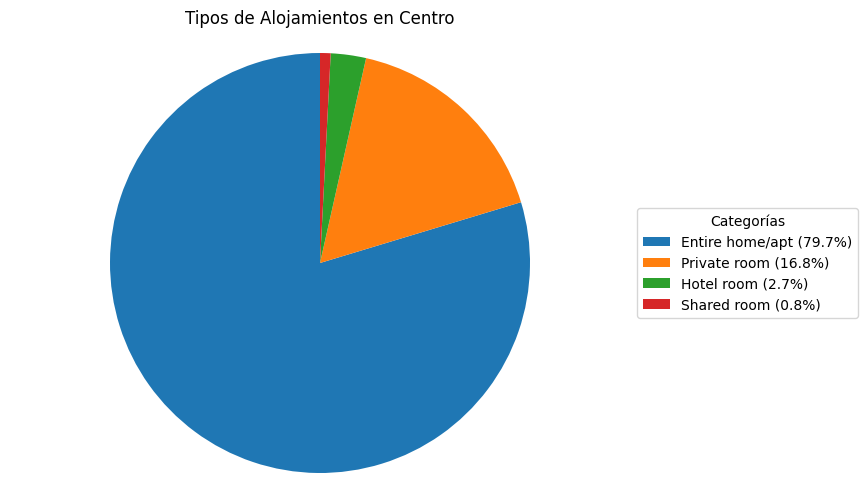

In [ ]:
distritos = ['Centro']
dibujar_diagrama_tipos_alojamientos(df_airbnb_filt, distritos)



# 11.-
Crear una función que dibuje un diagrama de barras con el número de alojamientos por distritos.

In [ ]:
def diagrama_barras_alojamientos_distrito(df_airbnb_filt):
    alojamientos_por_distrito = df_airbnb_filt['neighbourhood'].value_counts()

    #  diagrama de barras
    plt.figure(figsize=(12, 6))
    alojamientos_por_distrito.plot(kind='bar')
    plt.xlabel('Distrito')
    plt.ylabel('Número de Alojamientos')
    plt.title('Alojamientos por Distrito')
    plt.xticks(rotation=45, ha='right')
    plt.show()


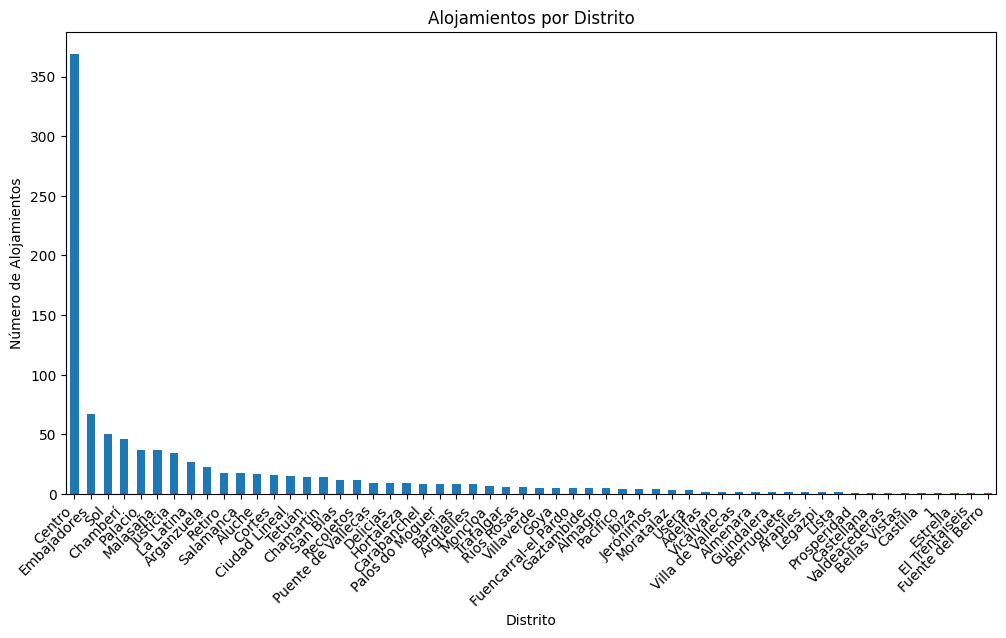

In [ ]:
diagrama_barras_alojamientos_distrito(df_airbnb_filt)

# 12.-
Crear una función que dibuje un diagrama de barras con los porcentajes acumulados de tipos de alojamientos por distritos.

In [ ]:
def diagrama_barras_acumulados_tipos_alojamientos(df_airbnb_filt):
    # Calcular los porcentajes acumulados de tipos de alojamientos por distrito
    porcentajes_acumulados = df_airbnb_filt.groupby('neighbourhood')['room_category'].value_counts(normalize=True).groupby(level=0).cumsum()

    #  diagrama de barras
    plt.figure(figsize=(12, 8))
    porcentajes_acumulados.unstack().plot(kind='bar', stacked=True)
    plt.xlabel('Distrito')
    plt.ylabel('Porcentaje Acumulado')
    plt.title('Porcentajes Acumulados de Tipos de Alojamientos por Distrito')
    plt.legend(loc='upper right')
    plt.xticks(rotation=45, ha='right')
    plt.show()


<Figure size 1200x800 with 0 Axes>

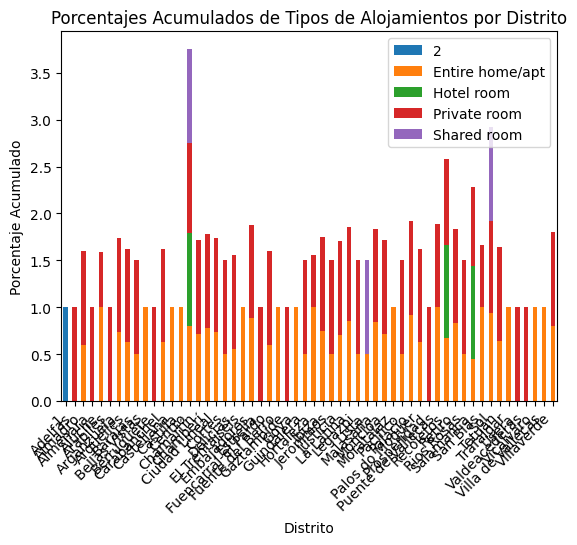

In [ ]:
diagrama_barras_acumulados_tipos_alojamientos(df_airbnb_filt)

# 13.-

  Crear una función reciba una lista de distritos y una lista de tipos de alojamientos, y dibuje un diagrama de sectores con la distribución del número de alojamientos de ese tipo por anfitrión.

In [ ]:
def diagrama_sectores(lista_distritos, lista_tipos_alojamientos):
    for distrito in lista_distritos:
        df_filtrado = df_airbnb_filt[df_airbnb_filt['neighbourhood'] == distrito]
        for tipo_alojamiento in lista_tipos_alojamientos:
            df_airbnb_filtrado_2 = df_filtrado[df_filtrado['room_category'] == tipo_alojamiento]
            counts = df_airbnb_filtrado_2['host'].value_counts().value_counts()
            labels = [f'{count} ({percentage:.1f}%)' for count, percentage in zip(counts.index, counts / counts.sum() * 100)]
            
            plt.pie(counts, labels=labels, autopct='', labeldistance=1.1)
            plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
            plt.title(f'{distrito} - {tipo_alojamiento}')
            plt.show()



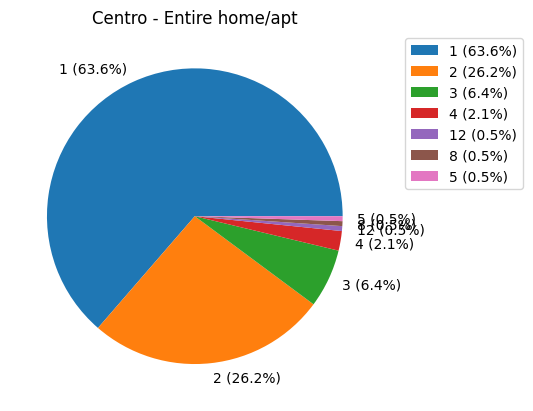

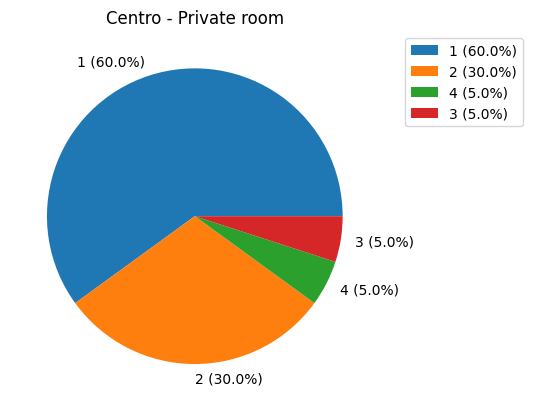

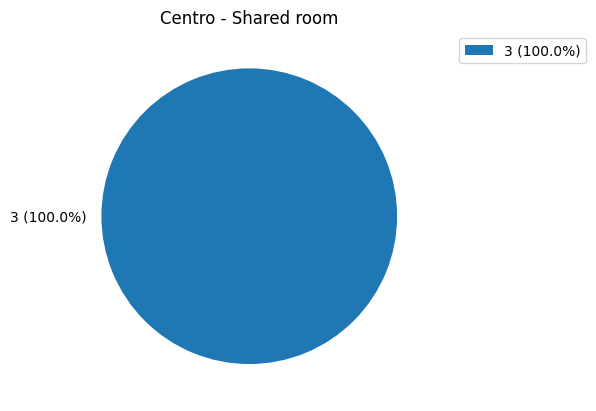

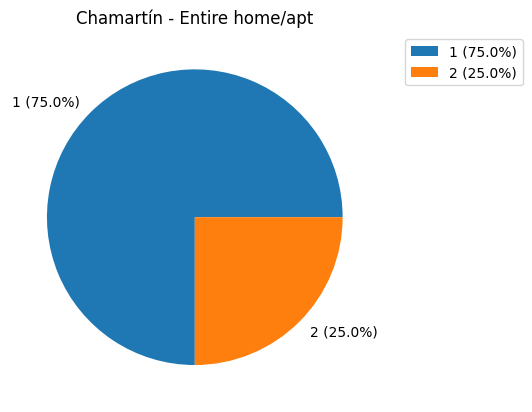

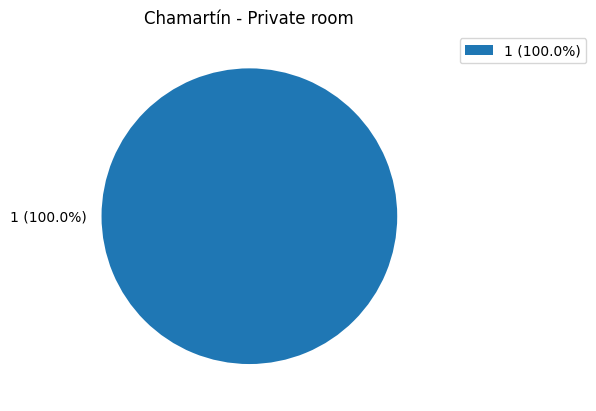

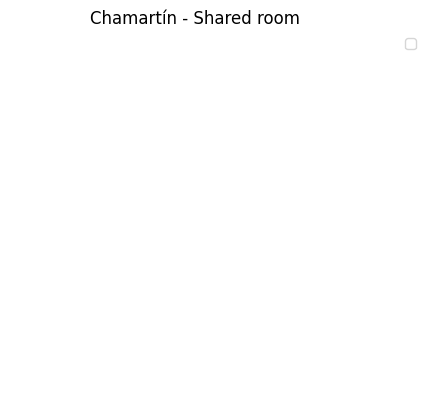

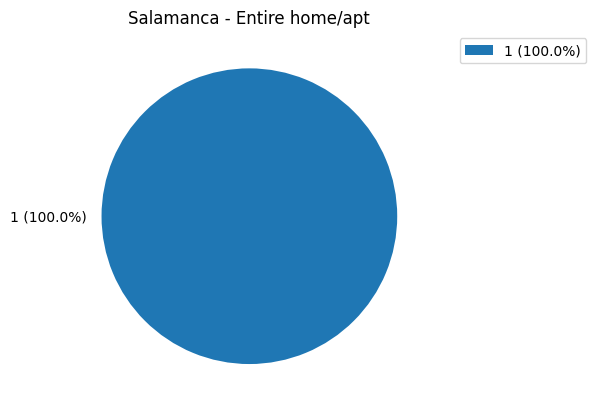

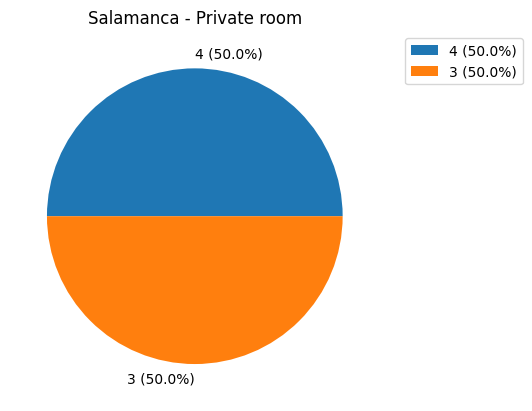

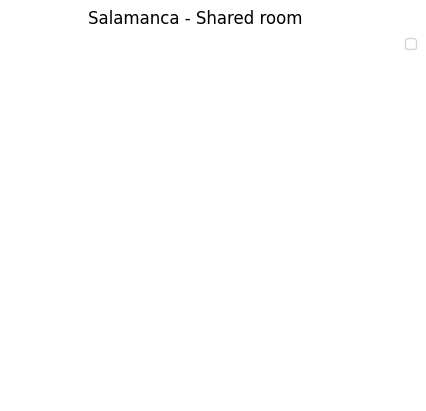

In [ ]:
lista_distritos = ['Centro', 'Chamartín', 'Salamanca']
lista_tipos_alojamientos = ['Entire home/apt', 'Private room', 'Shared room']
diagrama_sectores(lista_distritos, lista_tipos_alojamientos)

# 14.-
Crear una función que dibuje un diagrama de barras con los precios medios por persona y día de cada distrito.

In [ ]:
def diagrama_barras_precios_medios(lista_distritos):
    for distrito in lista_distritos:
        df_filtrado = df_airbnb_filt[df_airbnb_filt['neighbourhood'] == distrito]
        df_filtrado['minimum_cost_per_person'].plot(kind='hist', bins=20)
        plt.title(distrito)
        plt.show()



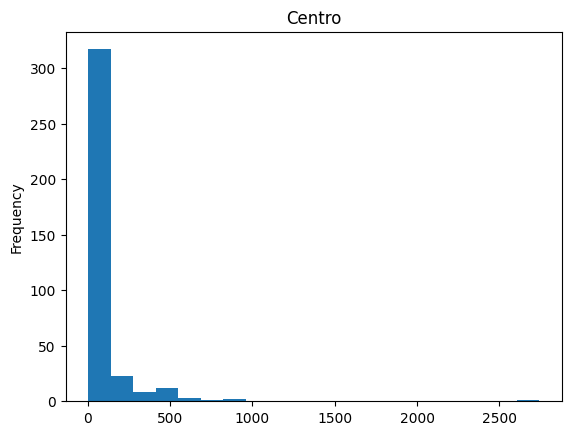

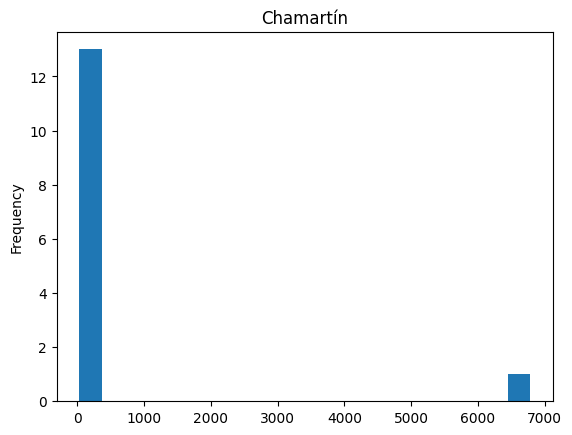

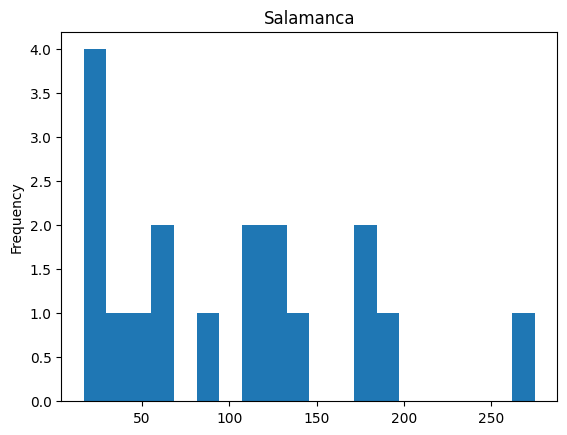

In [ ]:
lista_distritos = ['Centro', 'Chamartín', 'Salamanca']
diagrama_barras_precios_medios(lista_distritos)

#15.-

Crear una función que reciba una lista de distritos y dibuje un gráfico de dispersión con el coste mínimo por noche y persona y la puntuación en esos distritos

In [20]:

def distrito_noche_dia(df, distritos):
    # filtramos el DataFrame para solo incluir los distritos 
    df_filtered = df[df['neighbourhood'].isin(distritos)]

    plt.figure(figsize=(10,6))
    plt.scatter(df_filtered['minimum_cost_per_person'], df_filtered['rating_review'])


    plt.xlabel('Minimum Cost per Person')
    plt.ylabel('Rating Review')
    plt.title('Mínimo Coste por Persona vs Puntuación')

    plt.show()


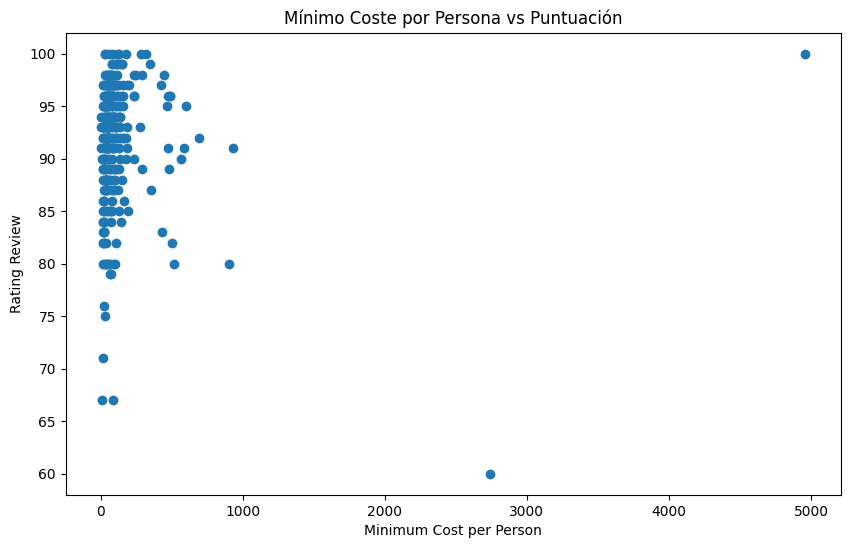

In [21]:
distrito_noche_dia(df_airbnb_filt,['Moncloa', 'Centro', 'Salamanca'])

#16.-
Crear una función que reciba una lista de distritos y dibuje dos histogramas con la distribución de precios por persona y día, uno para los alojamientos con título en inglés y otro para los alojamientos con títulos en español. Si la distribución es muy asimétrica, aplicar una transformación logarítmica. ¿Hay diferencias entre los precios de los alojamientos en inglés y el español? Nota: Para identificar el idioma puede usare el módulo langdetect.

<ipython-input-28-951ea1690a3e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['minimum_cost_per_person'] = np.log(df_filtrado['minimum_cost_per_person'])


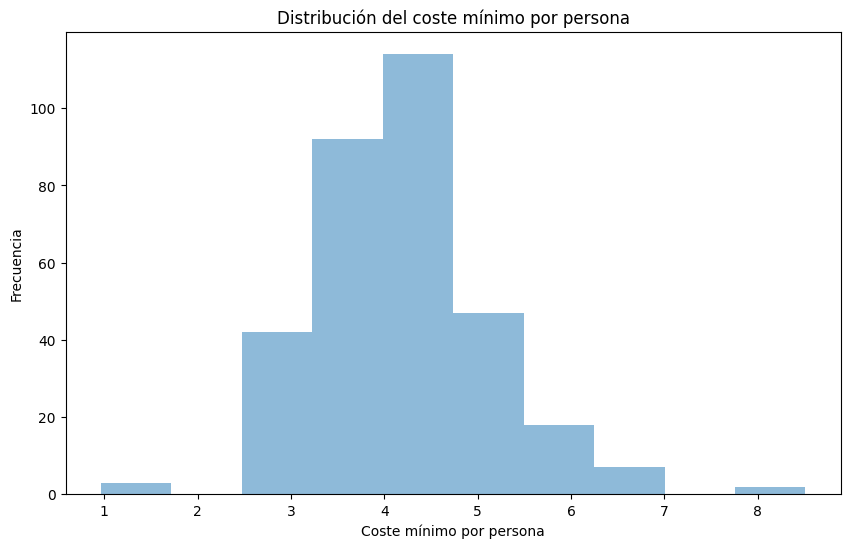

In [28]:

from langdetect import detect

def dibujar_histogramas(df, distritos):
    df_filtrado = df[df['neighbourhood'].isin(distritos)]

    if df_filtrado['minimum_cost_per_person'].skew() > 1:
        df_filtrado['minimum_cost_per_person'] = np.log(df_filtrado['minimum_cost_per_person'])

    # Creamos el histograma
    plt.figure(figsize=(10,6))
    plt.hist(df_filtrado['minimum_cost_per_person'], alpha=0.5)


    plt.xlabel('Coste mínimo por persona')
    plt.ylabel('Frecuencia')
    plt.title('Distribución del coste mínimo por persona')


    plt.show()
#Ejemplo
dibujar_histogramas(df_airbnb_filt, ['Moncloa', 'Centro', 'Salamanca'])


